In [232]:
SAMPLES = 700
NOISE = 0.1
BINS = 20

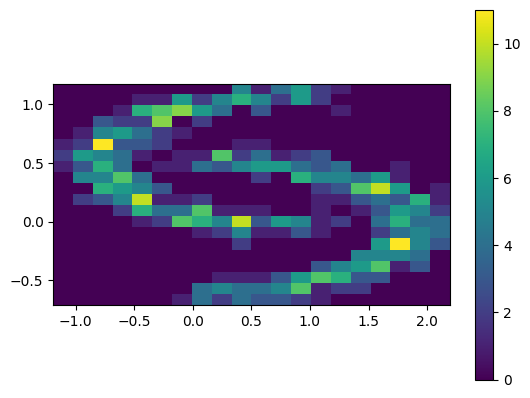

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the data
X, _ = make_moons(n_samples=SAMPLES, noise=NOISE)

# Create a 2D histogram
hist, x_edges, y_edges = np.histogram2d(X[:, 0], X[:, 1], bins=BINS)

# Visualize the histogram
plt.imshow(hist, interpolation='nearest', origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]])
plt.colorbar()
plt.show()

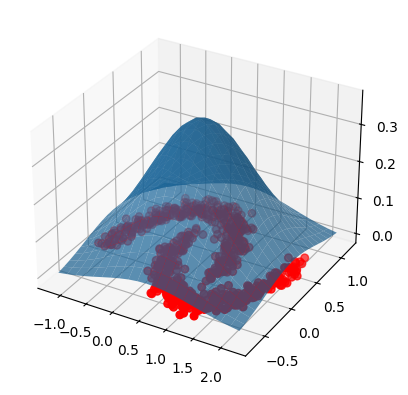

In [234]:
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

# using the hist data from above
x, y = np.meshgrid(x_edges, y_edges)

# Fit a Gaussian to the histogram data
x_mean = np.mean(X[:, 0])
x_std = np.std(X[:, 0])
y_mean = np.mean(X[:, 1])
y_std = np.std(X[:, 1])
pdf = norm.pdf(x, loc=x_mean, scale=x_std) * norm.pdf(y, loc=y_mean, scale=y_std)

# Visualize the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], np.zeros(len(X)), c='r', marker='o', s=30, label="Data Points")
ax.plot_surface(x, y, pdf, alpha=0.7)

plt.show()


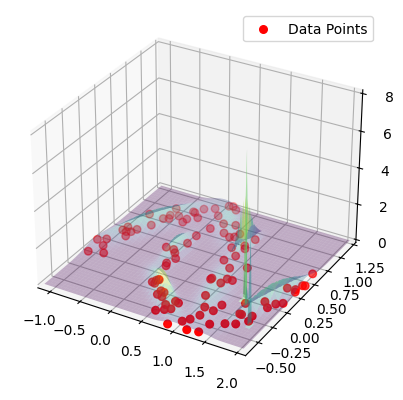

In [238]:
from scipy.stats import multivariate_normal

# Define the number of components
n_components = 8

# Initialize parameters
np.random.seed(0)
mu = np.random.rand(n_components, 2)  # Random initial means
cov = np.array([np.eye(2)] * n_components)  # Initialize with identity covariance matrices
weights = np.ones(n_components) / n_components  # Equal component weights

# Define the number of iterations
n_iterations = 100

# Create a grid for visualization
x, y = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for _ in range(n_iterations):
    # Expectation step: Calculate responsibilities
    responsibilities = np.zeros((len(X), n_components))
    for i in range(n_components):
        responsibilities[:, i] = weights[i] * multivariate_normal.pdf(X, mean=mu[i], cov=cov[i])
    responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]

    # Maximization step: Update parameters
    N_k = responsibilities.sum(axis=0)
    weights = N_k / len(X)
    for i in range(n_components):
        mu[i] = (1 / N_k[i]) * np.sum(X * responsibilities[:, i][:, np.newaxis], axis=0)
        cov[i] = (1 / N_k[i]) * np.dot((responsibilities[:, i][:, np.newaxis] * (X - mu[i])).T, (X - mu[i])) + 1e-6 * np.eye(2)

    # Calculate the PDF for the entire grid
    pdf = np.zeros(x.shape)
    for i in range(n_components):
        pdf += weights[i] * multivariate_normal.pdf(np.dstack((x, y)), mean=mu[i], cov=cov[i])

# Visualize the PDF surface
ax.plot_surface(x, y, pdf, cmap='viridis', alpha=0.3)

# Set the extent (limits) of the plot for X, Y, and Z
ax.set_xlim(X[:, 0].min(), X[:, 0].max())
ax.set_ylim(X[:, 1].min(), X[:, 1].max())
ax.set_zlim(0, pdf.max())  # Adjust the Z-axis limit based on your data and PDF

# Visualize the data points
ax.scatter(X[:, 0], X[:, 1], np.zeros(len(X)), c='r', marker='o', s=30, label="Data Points")

plt.legend()
plt.show()

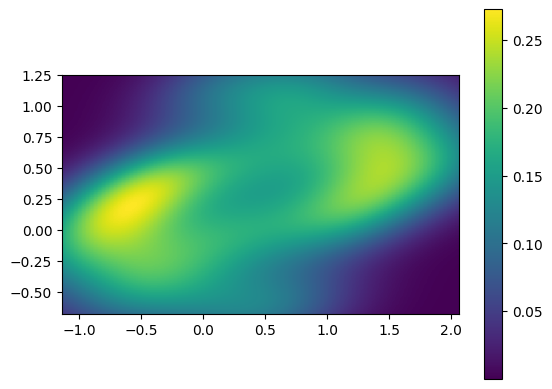

In [236]:
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# Fit a KDE with squared exponential kernel to the data
kde = gaussian_kde(X.T, bw_method="silverman")

# Create a grid of points for visualization
x, y = np.mgrid[X[:,0].min():X[:,0].max():100j, X[:,1].min():X[:,1].max():100j]
positions = np.vstack([x.ravel(), y.ravel()])

# Evaluate the KDE on the grid
density = kde(positions)

# Visualize the KDE
plt.imshow(density.reshape(x.shape), extent=[X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()])
plt.colorbar()
plt.show()